In [49]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import matplotlib.animation as animation 


class simulator(): pass


In [50]:
class bernoulli_trials(simulator):

    def __init__(self, n, p):
        '''
        n is number desired length of sequence
        p is probability of success
        '''
        self.n, self.p = n, p

        self.plot_w = 10
        self.plot_h = 7
        self.fontsize=10

        self.fps = 30
        self.E = 1/p # true expected value


    def simulate(self):
        seq = np.random.choice(['X', 'O'], size=self.n, p=[self.p, 1-self.p])

        ctr=0 # temporary counter to track number of "O" (makes) in a row
        dist = [] # distribution of occurences for X = k passes (k in a row)
        for i in seq:
            if i== 'X':
                if ctr!=0: dist.append(ctr) 
                ctr=0
                
            else: ctr+=1 # increment counter (i == 'O')

        so = np.sum(dist) # sum off occurences
        avg = so/len(dist) # (simulated) expected value
        # divide by to total possible occurences

        return (seq, dist, avg)


    def plot_sim(self, as_percents=True):

        (_, dist, avg) = self.simulate()


        '''
        Will plot output distribution 
        
        '''    

        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : self.fontsize}

        matplotlib.rc('font', **font)    

        plt.style.use('dark_background')

        fig, axs = plt.subplots(tight_layout=True)
        plt.rcParams['figure.figsize'] = (self.plot_w, self.plot_h)

        plt.axvline(x = 1/p, color='r', linestyle='--', linewidth=7.0) # Expected line
        plt.axvline(x = avg, color='g', linestyle='--', linewidth=7.0) # Average line
        plt.xticks(range(0, 20, 2))


        # N is the count in each bin, bins is the lower-limit of the bin

        if as_percents: density=True
        N, bins, patches = axs.hist(dist, bins=range(0, 20, 1), density=density)

        # We'll color code by height, but you could use any scalar
        fracs = N / N.max()

        # we need to normalize the data to 0..1 for the full range of the colormap
        norm = colors.Normalize(fracs.min(), fracs.max())

        # Now, we'll loop through our objects and set the color of each accordingly
        for thisfrac, thispatch in zip(fracs, patches):
            color = plt.cm.viridis(norm(thisfrac))
            thispatch.set_facecolor(color)

        if as_percents: axs.yaxis.set_major_formatter(PercentFormatter(xmax=1))  


    def animate_sim(self, filename, as_percents=True, start_order=2, end_order=4, dur=5):
        import matplotlib.pyplot as plt
        from matplotlib import animation

        frms = int(self.fps*dur)
        interval = int((1/self.fps)*100000)

        '''
        Will plot output distribution 
        
        '''    

        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : self.fontsize}

        matplotlib.rc('font', **font)    

        plt.style.use('dark_background')

        fig, axs = plt.subplots(tight_layout=True)
        plt.rcParams['figure.figsize'] = (self.plot_w, self.plot_h)


        def animate(frm):

            plt.cla()
            plt.ylim([0, .5])
            plt.xlim([0, 20])
            
            t_norm = (frm/frms)
            t = t_norm*dur

            order = start_order + (end_order-start_order)*t_norm

            self.n = int(10**order)

            (_, dist, avg) = self.simulate()


            plt.axvline(x = 1/p, color='r', linestyle='--', linewidth=7.0) # Expected line
            plt.axvline(x = avg, color='g', linestyle='--', linewidth=7.0) # Average line
            plt.xticks(range(0, 20, 2))

            # N is the count in each bin, bins is the lower-limit of the bin

            if as_percents: density=True
            N, bins, patches = axs.hist(dist, bins=range(0, 20, 1), density=density)

            # We'll color code by height, but you could use any scalar
            fracs = N / N.max()

            # we need to normalize the data to 0..1 for the full range of the colormap
            norm = colors.Normalize(fracs.min(), fracs.max())

            # Now, we'll loop through our objects and set the color of each accordingly
            for thisfrac, thispatch in zip(fracs, patches):
                color = plt.cm.viridis(norm(thisfrac))
                thispatch.set_facecolor(color)

            # if as_percents: axs.yaxis.set_major_formatter(PercentFormatter(xmax=1)) 


        anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=frms,
                                    interval=interval)

        anim.save(filename,writer=animation.FFMpegWriter(fps=self.fps))


    def simulate_many(self, N): 
        avgs = []
        for _ in range(N):
            seq = np.random.choice([0, 1], size=self.n, p=[self.p, 1-self.p])

            ctr=0 
            dist = [] 
            for i in seq:
                if i==0:
                    if ctr!=0: dist.append(ctr) 
                    ctr=0
                    
                else: ctr+=1 # increment counter (i == 'O')

            so = np.sum(dist) # sum off occurences
            avg = so/len(dist) # (simulated) expected value
            # divide by to total possible occurences

            avgs.append(avg)

        avg_avgs = np.sum(avgs)/N
        return (avg_avgs, avgs)


    def plot_sims(self, N, y_delta=5):
        '''
        Will plot average over many simulations
        '''    

        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : self.fontsize}

        matplotlib.rc('font', **font)    

        plt.style.use('dark_background')

        fig, axs = plt.subplots(tight_layout=True)
        plt.rcParams['figure.figsize'] = (self.plot_w, self.plot_h)


        # N is the count in each bin, bins is the lower-limit of the bin

        (avg_avgs, avgs) = self.simulate_many(N)

        E = 1/self.p # expected
        plt.ylim([E-y_delta, E+y_delta])
        plt.axhline(y = E, xmin = 0, xmax = N, color='r', linestyle='--', linewidth=7.0) # Expected line
        plt.axhline(y = avg_avgs, xmin = 0, xmax = N, color='g', linestyle='--', linewidth=7.0) # Average line

        axs.plot(avgs, 'o-', linewidth=5.0, markersize=10)


    def animate_sims(self, filename, N=100, start_order=2, end_order=4, dur=5, y_delta=5):
        import matplotlib.pyplot as plt
        from matplotlib import animation

        frms = int(self.fps*dur)
        interval = int((1/self.fps)*100000)


        font = {'family' : 'normal',
                'weight' : 'bold',
                'size'   : self.fontsize}

        matplotlib.rc('font', **font)    

        plt.style.use('dark_background')

        fig, axs = plt.subplots(tight_layout=True)
        plt.rcParams['figure.figsize'] = (self.plot_w, self.plot_h)


        def animate(frm):

            plt.cla()
            plt.ylim([self.E-y_delta, self.E+y_delta])


            t_norm = (frm/frms)
            t = t_norm*dur

            order = start_order + (end_order-start_order)*t_norm

            self.n = int(10**order)

            # N is the count in each bin, bins is the lower-limit of the bin

            (avg_avgs, avgs) = self.simulate_many(N)

            plt.axhline(y = self.E, xmin = 0, xmax = N, color='r', linestyle='--', linewidth=7.0) # Expected line
            plt.axhline(y = avg_avgs, xmin = 0, xmax = N, color='g', linestyle='--', linewidth=7.0) # Average line

            axs.plot(avgs, 'o-', linewidth=5.0, markersize=10)

        anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=frms,
                                    interval=interval)

        anim.save(filename,writer=animation.FFMpegWriter(fps=self.fps))

In [51]:
n = 100 # sequence length
p = 1-.776 # probability (of miss)


bt = bernoulli_trials(n, p)
bt.plot_w = 20
bt.plot_h = 7
bt.fontsize=25
bt.fps = 10


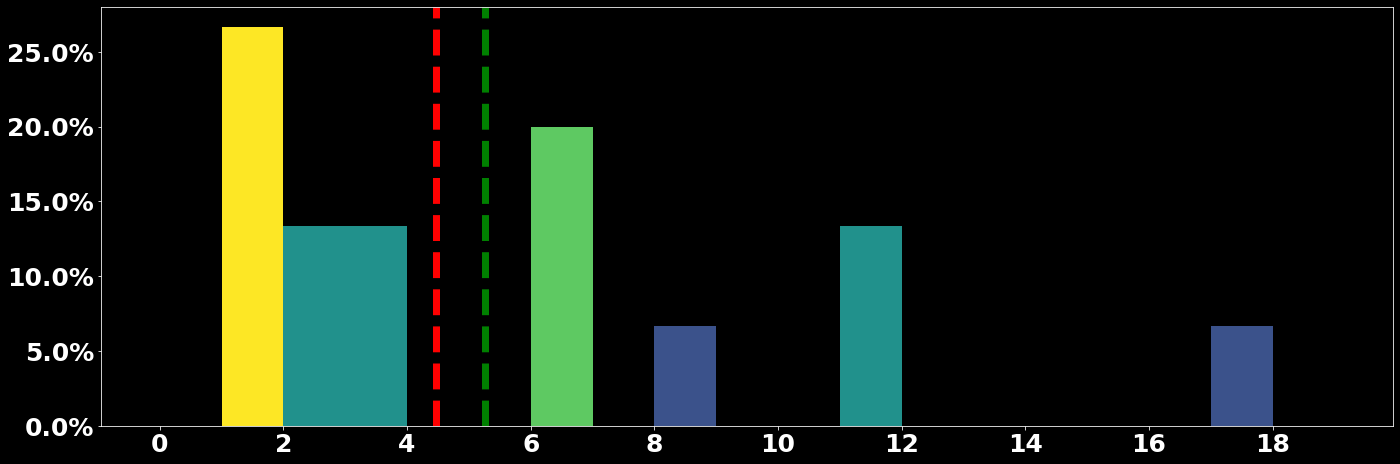

In [52]:
bt.plot_sim()

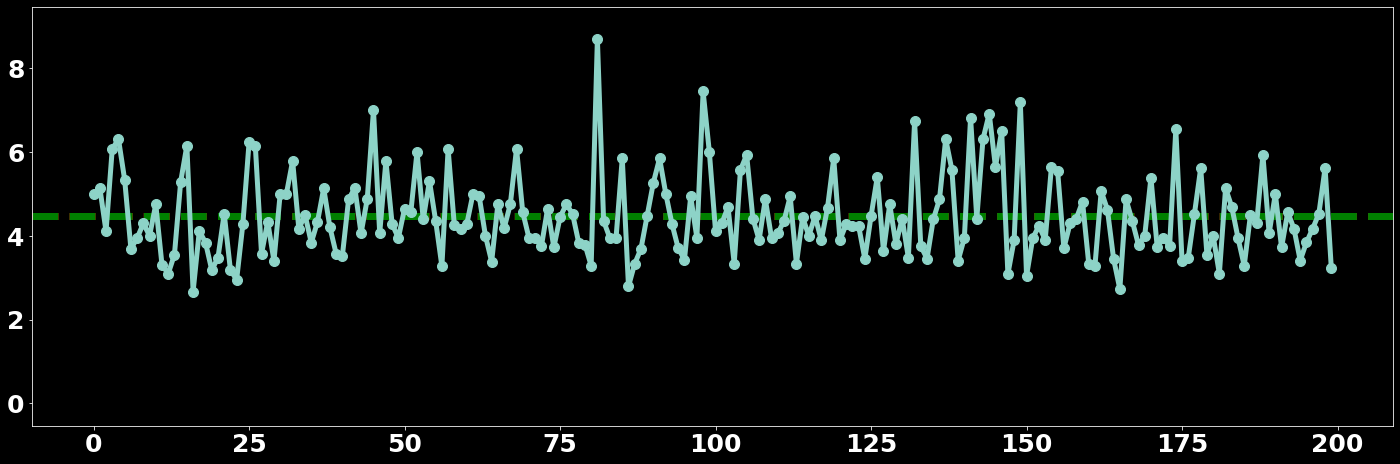

In [53]:
bt.plot_sims(200)

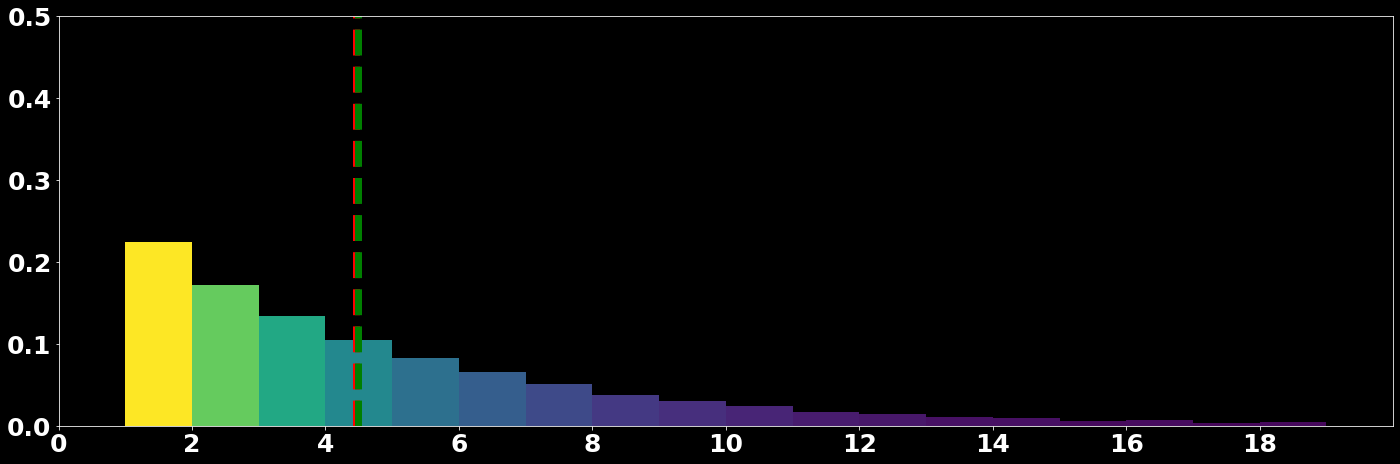

In [54]:
bt.animate_sim('moving_bars.mp4', dur=20, end_order=5)

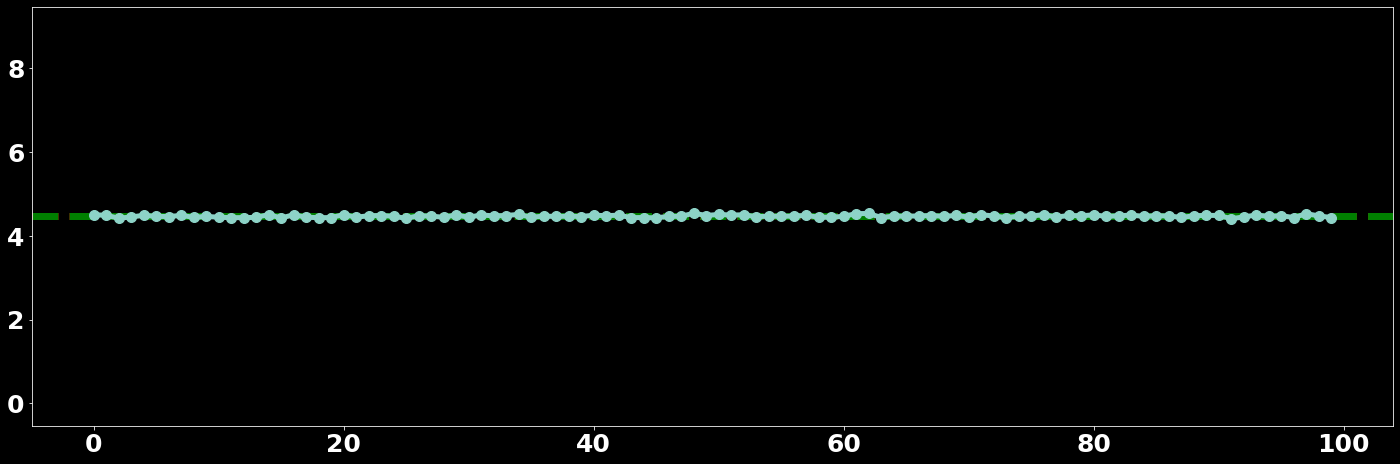

In [55]:
bt.animate_sims('moving_avgs.mp4', dur=20, end_order=5)